
El proceso de entrenamiento de un modelo de aprendizaje automático implica la importación de bibliotecas necesarias, la carga y preparación de datos (como la división en conjuntos de entrenamiento y prueba), la configuración y entrenamiento de una red neuronal, y la evaluación del rendimiento del modelo usando métricas como el classification_report de scikit-learn. Además, se utilizan visualizaciones para entender mejor los datos y el desempeño del modelo durante el entrenamiento y la validación.

In [37]:
#Adjunto evidencia del entrenamiento, la red y las comparaciones usadas en el modelo
#https://drive.google.com/drive/folders/14KBIiHTBSAptyJUy5BXZrpFUrb2rYuL-

import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

El código muestra un ejemplo de importación de bibliotecas necesarias para construir, entrenar y evaluar una red neuronal convolucional usando Keras y TensorFlow. Las bibliotecas importadas permiten crear un modelo secuencial (Sequential), agregar diferentes capas como convolucionales (Conv2D), de normalización por lotes (BatchNormalization), activaciones (LeakyReLU, Activation), y capas de aplanamiento (Flatten) y abandono (Dropout). Estas capas se utilizan para construir una red neuronal profunda que puede ser entrenada para tareas de clasificación de imágenes o datos similares, optimizando el rendimiento y reduciendo el sobreajuste.

In [38]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU


El código recorre un directorio específico en busca de imágenes con extensiones comunes (jpg, jpeg, png, bmp, tiff). A medida que encuentra imágenes, las carga en una lista llamada images usando plt.imread() y lleva un conteo de las imágenes leídas por cada subdirectorio. También imprime el progreso de la lectura de imágenes y almacena el número de imágenes en cada directorio en la lista dircount. Al final, se imprime la cantidad total de directorios leídos y la suma total de imágenes encontradas en todos los subdirectorios.

In [39]:
dirname = os.path.join(os.getcwd(),'C:\\Users\\jorge\\OneDrive\\Escritorio\\IA1\\InteligenciaArtificial\\ProyectosFinales\\CNN\\Imagenes1')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\jorge\OneDrive\Escritorio\IA1\InteligenciaArtificial\ProyectosFinales\CNN\Imagenes1\
C:\Users\jorge\OneDrive\Escritorio\IA1\InteligenciaArtificial\ProyectosFinales\CNN\Imagenes1\asalto 1
C:\Users\jorge\OneDrive\Escritorio\IA1\InteligenciaArtificial\ProyectosFinales\CNN\Imagenes1\incendio 8765
C:\Users\jorge\OneDrive\Escritorio\IA1\InteligenciaArtificial\ProyectosFinales\CNN\Imagenes1\inundacion 9389
C:\Users\jorge\OneDrive\Escritorio\IA1\InteligenciaArtificial\ProyectosFinales\CNN\Imagenes1\robo 5240
C:\Users\jorge\OneDrive\Escritorio\IA1\InteligenciaArtificial\ProyectosFinales\CNN\Imagenes1\tornado 6709
Directorios leidos: 5
Imagenes en cada directorio [8766, 9389, 5240, 6709, 8435]
suma Total de imagenes en subdirs: 38539


Leyendo...719
Leyendo...720
Leyendo...721
Leyendo...722
Leyendo...723
Leyendo...724
Leyendo...725
Leyendo...726
Leyendo...727
Leyendo...728
Leyendo...729
Leyendo...730
Leyendo...731
Leyendo...732
Leyendo...733
Leyendo...734
Leyendo...735
Leyendo...736
Leyendo...737
Leyendo...738
Leyendo...739
Leyendo...740
Leyendo...741
Leyendo...742
Leyendo...743
Leyendo...744
Leyendo...745
Leyendo...746
Leyendo...747
Leyendo...748
Leyendo...749
Leyendo...750
Leyendo...751
Leyendo...752
Leyendo...753
Leyendo...754
Leyendo...755
Leyendo...756
Leyendo...757
Leyendo...758
Leyendo...759
Leyendo...760
Leyendo...761
Leyendo...762
Leyendo...763
Leyendo...764
Leyendo...765
Leyendo...766
Leyendo...767
Leyendo...768
Leyendo...769
Leyendo...770
Leyendo...771
Leyendo...772
Leyendo...773
Leyendo...774
Leyendo...775
Leyendo...776
Leyendo...777
Leyendo...778
Leyendo...779
Leyendo...780
Leyendo...781
Leyendo...782
Leyendo...783
Leyendo...784
Leyendo...785
Leyendo...786
Leyendo...787
Leyendo...788
Leyendo...789
Leyend

Leyendo...1321
Leyendo...1322
Leyendo...1323
Leyendo...1324
Leyendo...1325
Leyendo...1326
Leyendo...1327
Leyendo...1328
Leyendo...1329
Leyendo...1330
Leyendo...1331
Leyendo...1332
Leyendo...1333
Leyendo...1334
Leyendo...1335
Leyendo...1336
Leyendo...1337
Leyendo...1338
Leyendo...1339
Leyendo...1340
Leyendo...1341
Leyendo...1342
Leyendo...1343
Leyendo...1344
Leyendo...1345
Leyendo...1346
Leyendo...1347
Leyendo...1348
Leyendo...1349
Leyendo...1350
Leyendo...1351
Leyendo...1352
Leyendo...1353
Leyendo...1354
Leyendo...1355
Leyendo...1356
Leyendo...1357
Leyendo...1358
Leyendo...1359
Leyendo...1360
Leyendo...1361
Leyendo...1362
Leyendo...1363
Leyendo...1364
Leyendo...1365
Leyendo...1366
Leyendo...1367
Leyendo...1368
Leyendo...1369
Leyendo...1370
Leyendo...1371
Leyendo...1372
Leyendo...1373
Leyendo...1374
Leyendo...1375
Leyendo...1376
Leyendo...1377
Leyendo...1378
Leyendo...1379
Leyendo...1380
Leyendo...1381
Leyendo...1382
Leyendo...1383
Leyendo...1384
Leyendo...1385
Leyendo...1386
Leyendo...

Leyendo...2104
Leyendo...2105
Leyendo...2106
Leyendo...2107
Leyendo...2108
Leyendo...2109
Leyendo...2110
Leyendo...2111
Leyendo...2112
Leyendo...2113
Leyendo...2114
Leyendo...2115
Leyendo...2116
Leyendo...2117
Leyendo...2118
Leyendo...2119
Leyendo...2120
Leyendo...2121
Leyendo...2122
Leyendo...2123
Leyendo...2124
Leyendo...2125
Leyendo...2126
Leyendo...2127
Leyendo...2128
Leyendo...2129
Leyendo...2130
Leyendo...2131
Leyendo...2132
Leyendo...2133
Leyendo...2134
Leyendo...2135
Leyendo...2136
Leyendo...2137
Leyendo...2138
Leyendo...2139
Leyendo...2140
Leyendo...2141
Leyendo...2142
Leyendo...2143
Leyendo...2144
Leyendo...2145
Leyendo...2146
Leyendo...2147
Leyendo...2148
Leyendo...2149
Leyendo...2150
Leyendo...2151
Leyendo...2152
Leyendo...2153
Leyendo...2154
Leyendo...2155
Leyendo...2156
Leyendo...2157
Leyendo...2158
Leyendo...2159
Leyendo...2160
Leyendo...2161
Leyendo...2162
Leyendo...2163
Leyendo...2164
Leyendo...2165
Leyendo...2166
Leyendo...2167
Leyendo...2168
Leyendo...2169
Leyendo...

Leyendo...2853
Leyendo...2854
Leyendo...2855
Leyendo...2856
Leyendo...2857
Leyendo...2858
Leyendo...2859
Leyendo...2860
Leyendo...2861
Leyendo...2862
Leyendo...2863
Leyendo...2864
Leyendo...2865
Leyendo...2866
Leyendo...2867
Leyendo...2868
Leyendo...2869
Leyendo...2870
Leyendo...2871
Leyendo...2872
Leyendo...2873
Leyendo...2874
Leyendo...2875
Leyendo...2876
Leyendo...2877
Leyendo...2878
Leyendo...2879
Leyendo...2880
Leyendo...2881
Leyendo...2882
Leyendo...2883
Leyendo...2884
Leyendo...2885
Leyendo...2886
Leyendo...2887
Leyendo...2888
Leyendo...2889
Leyendo...2890
Leyendo...2891
Leyendo...2892
Leyendo...2893
Leyendo...2894
Leyendo...2895
Leyendo...2896
Leyendo...2897
Leyendo...2898
Leyendo...2899
Leyendo...2900
Leyendo...2901
Leyendo...2902
Leyendo...2903
Leyendo...2904
Leyendo...2905
Leyendo...2906
Leyendo...2907
Leyendo...2908
Leyendo...2909
Leyendo...2910
Leyendo...2911
Leyendo...2912
Leyendo...2913
Leyendo...2914
Leyendo...2915
Leyendo...2916
Leyendo...2917
Leyendo...2918
Leyendo...

Leyendo...3618
Leyendo...3619
Leyendo...3620
Leyendo...3621
Leyendo...3622
Leyendo...3623
Leyendo...3624
Leyendo...3625
Leyendo...3626
Leyendo...3627
Leyendo...3628
Leyendo...3629
Leyendo...3630
Leyendo...3631
Leyendo...3632
Leyendo...3633
Leyendo...3634
Leyendo...3635
Leyendo...3636
Leyendo...3637
Leyendo...3638
Leyendo...3639
Leyendo...3640
Leyendo...3641
Leyendo...3642
Leyendo...3643
Leyendo...3644
Leyendo...3645
Leyendo...3646
Leyendo...3647
Leyendo...3648
Leyendo...3649
Leyendo...3650
Leyendo...3651
Leyendo...3652
Leyendo...3653
Leyendo...3654
Leyendo...3655
Leyendo...3656
Leyendo...3657
Leyendo...3658
Leyendo...3659
Leyendo...3660
Leyendo...3661
Leyendo...3662
Leyendo...3663
Leyendo...3664
Leyendo...3665
Leyendo...3666
Leyendo...3667
Leyendo...3668
Leyendo...3669
Leyendo...3670
Leyendo...3671
Leyendo...3672
Leyendo...3673
Leyendo...3674
Leyendo...3675
Leyendo...3676
Leyendo...3677
Leyendo...3678
Leyendo...3679
Leyendo...3680
Leyendo...3681
Leyendo...3682
Leyendo...3683
Leyendo...

Leyendo...4407
Leyendo...4408
Leyendo...4409
Leyendo...4410
Leyendo...4411
Leyendo...4412
Leyendo...4413
Leyendo...4414
Leyendo...4415
Leyendo...4416
Leyendo...4417
Leyendo...4418
Leyendo...4419
Leyendo...4420
Leyendo...4421
Leyendo...4422
Leyendo...4423
Leyendo...4424
Leyendo...4425
Leyendo...4426
Leyendo...4427
Leyendo...4428
Leyendo...4429
Leyendo...4430
Leyendo...4431
Leyendo...4432
Leyendo...4433
Leyendo...4434
Leyendo...4435
Leyendo...4436
Leyendo...4437
Leyendo...4438
Leyendo...4439
Leyendo...4440
Leyendo...4441
Leyendo...4442
Leyendo...4443
Leyendo...4444
Leyendo...4445
Leyendo...4446
Leyendo...4447
Leyendo...4448
Leyendo...4449
Leyendo...4450
Leyendo...4451
Leyendo...4452
Leyendo...4453
Leyendo...4454
Leyendo...4455
Leyendo...4456
Leyendo...4457
Leyendo...4458
Leyendo...4459
Leyendo...4460
Leyendo...4461
Leyendo...4462
Leyendo...4463
Leyendo...4464
Leyendo...4465
Leyendo...4466
Leyendo...4467
Leyendo...4468
Leyendo...4469
Leyendo...4470
Leyendo...4471
Leyendo...4472
Leyendo...

Leyendo...5179
Leyendo...5180
Leyendo...5181
Leyendo...5182
Leyendo...5183
Leyendo...5184
Leyendo...5185
Leyendo...5186
Leyendo...5187
Leyendo...5188
Leyendo...5189
Leyendo...5190
Leyendo...5191
Leyendo...5192
Leyendo...5193
Leyendo...5194
Leyendo...5195
Leyendo...5196
Leyendo...5197
Leyendo...5198
Leyendo...5199
Leyendo...5200
Leyendo...5201
Leyendo...5202
Leyendo...5203
Leyendo...5204
Leyendo...5205
Leyendo...5206
Leyendo...5207
Leyendo...5208
Leyendo...5209
Leyendo...5210
Leyendo...5211
Leyendo...5212
Leyendo...5213
Leyendo...5214
Leyendo...5215
Leyendo...5216
Leyendo...5217
Leyendo...5218
Leyendo...5219
Leyendo...5220
Leyendo...5221
Leyendo...5222
Leyendo...5223
Leyendo...5224
Leyendo...5225
Leyendo...5226
Leyendo...5227
Leyendo...5228
Leyendo...5229
Leyendo...5230
Leyendo...5231
Leyendo...5232
Leyendo...5233
Leyendo...5234
Leyendo...5235
Leyendo...5236
Leyendo...5237
Leyendo...5238
Leyendo...5239
Leyendo...5240
Leyendo...5241
Leyendo...5242
Leyendo...5243
Leyendo...5244
Leyendo...

Leyendo...5975
Leyendo...5976
Leyendo...5977
Leyendo...5978
Leyendo...5979
Leyendo...5980
Leyendo...5981
Leyendo...5982
Leyendo...5983
Leyendo...5984
Leyendo...5985
Leyendo...5986
Leyendo...5987
Leyendo...5988
Leyendo...5989
Leyendo...5990
Leyendo...5991
Leyendo...5992
Leyendo...5993
Leyendo...5994
Leyendo...5995
Leyendo...5996
Leyendo...5997
Leyendo...5998
Leyendo...5999
Leyendo...6000
Leyendo...6001
Leyendo...6002
Leyendo...6003
Leyendo...6004
Leyendo...6005
Leyendo...6006
Leyendo...6007
Leyendo...6008
Leyendo...6009
Leyendo...6010
Leyendo...6011
Leyendo...6012
Leyendo...6013
Leyendo...6014
Leyendo...6015
Leyendo...6016
Leyendo...6017
Leyendo...6018
Leyendo...6019
Leyendo...6020
Leyendo...6021
Leyendo...6022
Leyendo...6023
Leyendo...6024
Leyendo...6025
Leyendo...6026
Leyendo...6027
Leyendo...6028
Leyendo...6029
Leyendo...6030
Leyendo...6031
Leyendo...6032
Leyendo...6033
Leyendo...6034
Leyendo...6035
Leyendo...6036
Leyendo...6037
Leyendo...6038
Leyendo...6039
Leyendo...6040
Leyendo...

Leyendo...6761
Leyendo...6762
Leyendo...6763
Leyendo...6764
Leyendo...6765
Leyendo...6766
Leyendo...6767
Leyendo...6768
Leyendo...6769
Leyendo...6770
Leyendo...6771
Leyendo...6772
Leyendo...6773
Leyendo...6774
Leyendo...6775
Leyendo...6776
Leyendo...6777
Leyendo...6778
Leyendo...6779
Leyendo...6780
Leyendo...6781
Leyendo...6782
Leyendo...6783
Leyendo...6784
Leyendo...6785
Leyendo...6786
Leyendo...6787
Leyendo...6788
Leyendo...6789
Leyendo...6790
Leyendo...6791
Leyendo...6792
Leyendo...6793
Leyendo...6794
Leyendo...6795
Leyendo...6796
Leyendo...6797
Leyendo...6798
Leyendo...6799
Leyendo...6800
Leyendo...6801
Leyendo...6802
Leyendo...6803
Leyendo...6804
Leyendo...6805
Leyendo...6806
Leyendo...6807
Leyendo...6808
Leyendo...6809
Leyendo...6810
Leyendo...6811
Leyendo...6812
Leyendo...6813
Leyendo...6814
Leyendo...6815
Leyendo...6816
Leyendo...6817
Leyendo...6818
Leyendo...6819
Leyendo...6820
Leyendo...6821
Leyendo...6822
Leyendo...6823
Leyendo...6824
Leyendo...6825
Leyendo...6826
Leyendo...

/home/likcos/DataSets/sportimages/sportimages/golf 7533
/home/likcos/DataSets/sportimages/sportimages/boxeo 9768
/home/likcos/DataSets/sportimages/sportimages/tenis 7125
/home/likcos/DataSets/sportimages/sportimages/basket 8937
Directorios leidos: 10
Imagenes en cada directorio [9349, 5172, 7617, 7752, 5053, 7533, 9768, 7125, 8937, 8822]
suma Total de imagenes en subdirs: 77128


# Cargar set de Imágenes

# Creamos las etiquetas 
El código asigna etiquetas a las imágenes cargadas en función del subdirectorio en el que se encuentran. Utiliza el conteo de imágenes por directorio almacenado en dircount para iterar y crear etiquetas secuenciales. Cada subdirectorio recibe un índice como etiqueta, y se añade esta etiqueta a la lista labels para cada imagen en el subdirectorio correspondiente. Al final, imprime la cantidad total de etiquetas creadas, que debe coincidir con el número total de imágenes leídas.

In [40]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  38539



El código asigna nombres de subdirectorios a incidentes y los guarda en archivos usando pickle. Primero, itera sobre directories, extrae y almacena el nombre de cada subdirectorio en Incidentes, y luego guarda esta lista en un archivo mapeo_clases.pkl. Además, guarda la lista directories en un archivo nombres_directories.pkl, permitiendo recuperar los mapeos de clases y nombres de directorios posteriormente.

In [41]:
import pickle
Incidentes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    Incidentes.append(name[len(name)-1])
    indice=indice+1

# Guardar el mapeo de clases
with open('mapeo_clases.pkl', 'wb') as f:
    pickle.dump(Incidentes, f)

# Guardar los nombres de los directorios
with open('nombres_directories.pkl', 'wb') as f:
    pickle.dump(directories, f)


0 asalto
1 incendio
2 inundacion
3 robo
4 tornado


El código convierte las listas de etiquetas e imágenes a arreglos de NumPy, con y representando las etiquetas y X las imágenes. Luego, identifica las clases únicas en las etiquetas, calcula el número total de clases y las imprime junto con sus valores únicos. Este proceso facilita el manejo de datos y la identificación de las clases en el conjunto de datos, lo cual es crucial para la etapa de entrenamiento de modelos de clasificación en aprendizaje automático.

In [42]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test El código divide el conjunto de datos en entrenamiento y prueba usando train_test_split, con un 20% de los datos reservados para la prueba. Luego, imprime las formas de los datos de entrenamiento y prueba para verificar la división. Esto asegura que el modelo se entrene en un subconjunto de los datos y se evalúe en un conjunto separado para medir su rendimiento.

In [43]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (30831, 28, 28, 3) (30831,)
Testing data shape :  (7708, 28, 28, 3) (7708,)


El código crea una figura con dos subgráficos, uno al lado del otro, cada uno mostrando una imagen. Un subgráfico muestra la primera imagen de los datos de entrenamiento, mientras que el otro muestra la primera imagen de los datos de prueba. Los títulos de cada subgráfico indican la etiqueta verdadera asociada con cada imagen. Para que este código funcione, necesitas tener matrices train_X y train_Y que contengan las imágenes de entrenamiento y sus etiquetas correspondientes, y matrices test_X y test_Y que contengan las imágenes de prueba y sus etiquetas correspondientes. Asegúrate de que train_X[0,:,:], train_Y[0], test_X[0,:,:] y test_Y[0] sean referencias válidas a la primera imagen y su etiqueta en ambos conjuntos de datos.

Text(0.5, 1.0, 'Ground Truth : 0')

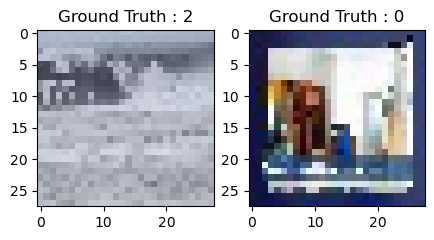

In [44]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

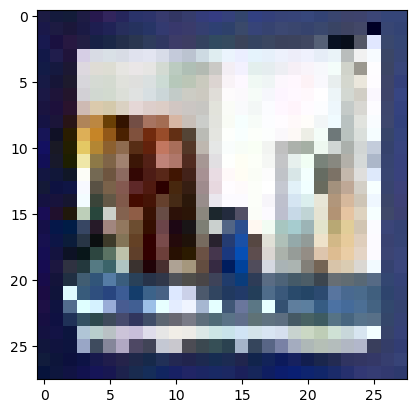

In [45]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [46]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
print(len(train_X))
print(len(train_Y_one_hot))


Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0.]
30831
30831


# Creamos el Set de Entrenamiento y Validación

In [47]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [48]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(24664, 28, 28, 3) (6167, 28, 28, 3) (24664, 5) (6167, 5)


# Creamos el modelo de CNN

In [49]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [50]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))
sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))



In [51]:
sport_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                200736    
                                                      

In [52]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])




# Entrenamos el modelo: Aprende a clasificar imágenes

In [53]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))



Epoch 1/20
386/386 [==============================] - 8s 20ms/step - loss: 1.5515 - accuracy: 0.2932 - val_loss: 1.4283 - val_accuracy: 0.5872
Epoch 2/20
386/386 [==============================] - 7s 19ms/step - loss: 1.3817 - accuracy: 0.4644 - val_loss: 1.1892 - val_accuracy: 0.7380
Epoch 3/20
386/386 [==============================] - 7s 19ms/step - loss: 1.1910 - accuracy: 0.5683 - val_loss: 0.9687 - val_accuracy: 0.7735
Epoch 4/20
386/386 [==============================] - 7s 19ms/step - loss: 1.0352 - accuracy: 0.6383 - val_loss: 0.8060 - val_accuracy: 0.7913
Epoch 5/20
386/386 [==============================] - 8s 20ms/step - loss: 0.9187 - accuracy: 0.6820 - val_loss: 0.6856 - val_accuracy: 0.8698
Epoch 6/20
386/386 [==============================] - 7s 19ms/step - loss: 0.8202 - accuracy: 0.7237 - val_loss: 0.6023 - val_accuracy: 0.8601
Epoch 7/20
386/386 [==============================] - 8s 20ms/step - loss: 0.7579 - accuracy: 0.7409 - val_loss: 0.5406 - val_accuracy: 0.8858

In [55]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("C:\\Users\\jorge\\OneDrive\\Escritorio\\IA1\\InteligenciaArtificial\\ProyectosFinales\\CNN\\jorge2.h5")

# Evaluamos la red

In [56]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

241/241 [==============================] - 1s 3ms/step - loss: 0.2626 - accuracy: 0.9318


In [57]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2626498341560364
Test accuracy: 0.931759238243103


In [58]:
sport_train.history

{'loss': [1.5515456199645996,
  1.381670594215393,
  1.190971851348877,
  1.035157322883606,
  0.9186609983444214,
  0.8202430009841919,
  0.7578571438789368,
  0.7066106200218201,
  0.6574862003326416,
  0.6213391423225403,
  0.5881267786026001,
  0.5557054281234741,
  0.5331348180770874,
  0.5103971362113953,
  0.4927321970462799,
  0.4801912009716034,
  0.4579954445362091,
  0.44788455963134766,
  0.43294209241867065,
  0.42500433325767517],
 'accuracy': [0.2932208776473999,
  0.4643610119819641,
  0.5683181881904602,
  0.638298749923706,
  0.6820061802864075,
  0.7237268686294556,
  0.7409179210662842,
  0.7613525986671448,
  0.7804492115974426,
  0.795329213142395,
  0.8085063099861145,
  0.818845272064209,
  0.8314952850341797,
  0.8390771746635437,
  0.8463752865791321,
  0.8500243425369263,
  0.8602821826934814,
  0.8650259375572205,
  0.8688777089118958,
  0.8717564344406128],
 'val_loss': [1.4283463954925537,
  1.1892186403274536,
  0.9686748385429382,
  0.805980384349823,
  

 utilizando TensorFlow o Keras. En este código, se están trazando las curvas de entrenamiento y validación de precisión y pérdida a lo largo de las épocas del entrenamiento. Se accede al historial de entrenamiento (sport_train.history) para obtener las métricas de precisión y pérdida tanto para el conjunto de entrenamiento como para el conjunto de validación. Luego, estas métricas se trazan utilizando matplotlib.pyplot. La primera figura muestra la precisión de entrenamiento y validación, mientras que la segunda figura muestra la pérdida de entrenamiento y validación. Las curvas de precisión se representan como puntos azules y líneas azules, mientras que las curvas de pérdida se representan de manera similar en color azul. El uso de estas visualizaciones puede ayudar a comprender cómo se está desempeñando el modelo durante el entrenamiento y si hay signos de sobreajuste o subajuste.

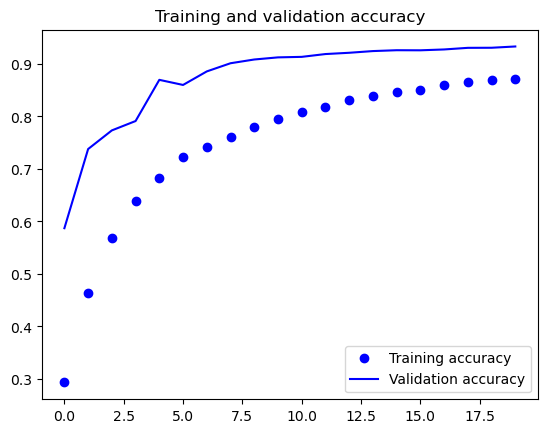

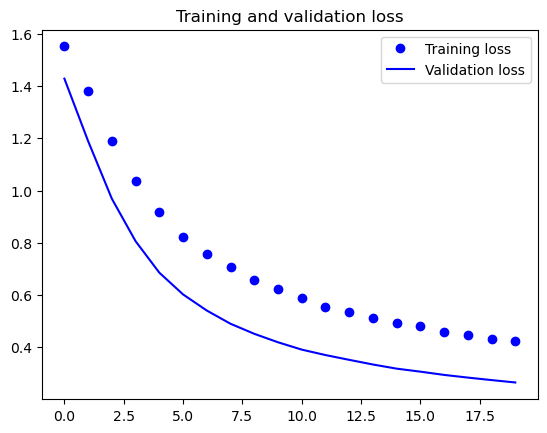

In [59]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [60]:
predicted_classes2 = sport_model.predict(test_X)

241/241 [==============================] - 1s 3ms/step


In [61]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [62]:
predicted_classes.shape, test_Y.shape

((7708,), (7708,))

# Aprendamos de los errores: Qué mejorar

Found 7182 correct labels


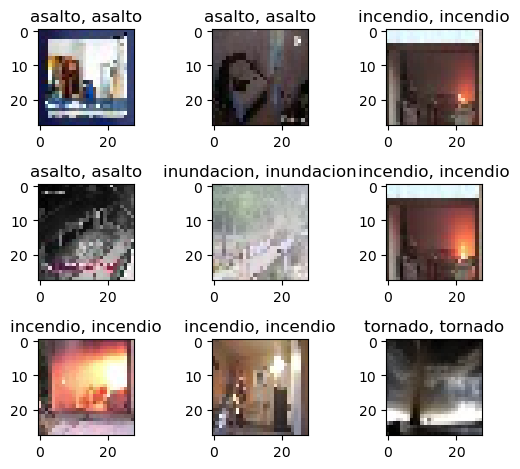

In [63]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(Incidentes[predicted_classes[correct]],
                                                    Incidentes[test_Y[correct]]))

    plt.tight_layout()

Found 526 incorrect labels


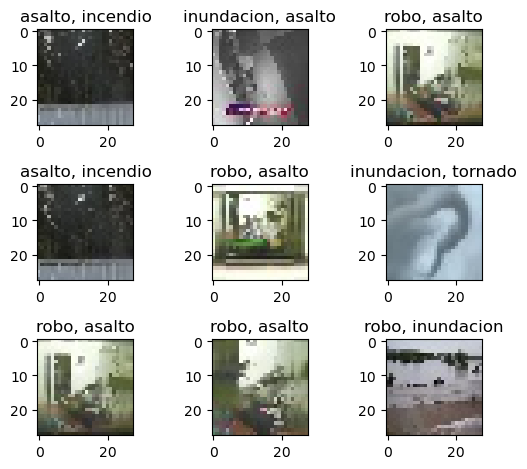

In [64]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(Incidentes[predicted_classes[incorrect]],
                                                    Incidentes[test_Y[incorrect]]))
    plt.tight_layout()

In [65]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.96      0.94      0.95      1747
     Class 1       1.00      0.99      0.99      1903
     Class 2       0.80      0.86      0.83      1021
     Class 3       0.88      0.91      0.90      1353
     Class 4       0.97      0.91      0.94      1684

    accuracy                           0.93      7708
   macro avg       0.92      0.92      0.92      7708
weighted avg       0.93      0.93      0.93      7708



Este código carga un modelo previamente entrenado desde un archivo .h5, junto con un mapeo de clases almacenado en un archivo mapeo_clases.pkl. Luego, se proporciona una lista de nombres de archivo de imágenes que se desean predecir. Para cada imagen, se carga, redimensiona a 28x28 píxeles y normaliza. Las imágenes normalizadas se utilizan para hacer predicciones utilizando el modelo cargado. Las predicciones se interpretan utilizando el mapeo de clases y se superponen en las imágenes originales como texto. Finalmente, las imágenes con las predicciones superpuestas se muestran utilizando matplotlib.pyplot. Este código parece estar diseñado para predecir y visualizar etiquetas de imágenes utilizando un modelo de red neuronal convolucional (CNN).

1/1 [==============================] - 0s 61ms/step


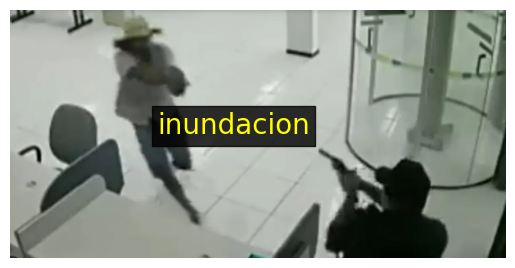

In [82]:
import pickle
from skimage.transform import resize
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Cargar el modelo entrenado desde el archivo .h5
sport_model = load_model('C:\\Users\\jorge\\OneDrive\\Escritorio\\IA1\\InteligenciaArtificial\\ProyectosFinales\\CNN\\jorge2.h5')

# Cargar el mapeo de clases
with open('mapeo_clases.pkl', 'rb') as f:
    Incidentes = pickle.load(f)

# Lista de imágenes a predecir
filenames = ['C:\\Users\\jorge\\OneDrive\\Escritorio\\IA1\\InteligenciaArtificial\\ProyectosFinales\\CNN\\prueba\\asalto22.png']

images = []
for filepath in filenames:
    img = cv.imread(filepath)
    img_resized = cv.resize(img, (28, 28), interpolation=cv.INTER_AREA)
    images.append(img_resized)

X = np.array(images, dtype=np.uint8)  # Convierto de lista a numpy
test_X = X.astype('float32') / 255.

# Realizar predicciones
predicted_classes = sport_model.predict(test_X)

# Imprimir las predicciones en las imágenes y mostrarlas
for i, img_tagged in enumerate(predicted_classes):
    predicted_label = Incidentes[np.argmax(img_tagged)]
    
    # Superponer el texto del resultado en la imagen
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.text(190, 160, predicted_label, fontsize=20, color='yellow', bbox=dict(facecolor='black', alpha=0.8))
    plt.show()

Este código carga un modelo previamente entrenado desde un archivo .h5, junto con un mapeo de clases almacenado en un archivo mapeo_clases.pkl. Luego, se proporciona una lista de nombres de archivo de imágenes que se desean predecir. Estas imágenes se cargan y preprocesan utilizando la función load_and_preprocess_image, que carga una imagen, la redimensiona a 28x28 píxeles y la normaliza. Las imágenes normalizadas se utilizan para hacer predicciones utilizando el modelo cargado. Las predicciones se interpretan utilizando el mapeo de clases y se superponen en las imágenes originales como texto utilizando la función display_prediction. Finalmente, las imágenes con las predicciones superpuestas se muestran utilizando matplotlib.pyplot. Este código parece estar diseñado para predecir y visualizar etiquetas de imágenes utilizando un modelo de red neuronal convolucional (CNN).

1/1 [==============================] - 0s 59ms/step


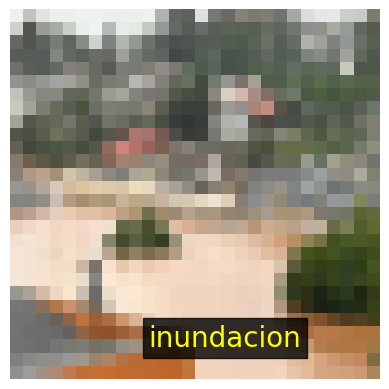

In [65]:
import pickle
from skimage.transform import resize
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Cargar el modelo entrenado desde el archivo .h5
sport_model = load_model('C:\\Users\\jorge\\OneDrive\\Escritorio\\IA1\\InteligenciaArtificial\\ProyectosFinales\\CNN\\jorge1.h5')

# Cargar el mapeo de clases
with open('mapeo_clases.pkl', 'rb') as f:
    Incidentes = pickle.load(f)

# Lista de imágenes a predecir
filenames = ['C:\\Users\\jorge\\OneDrive\\Escritorio\\IA1\\InteligenciaArtificial\\ProyectosFinales\\CNN\\prueba\\inundacion4.jpg']

# Función para cargar y preprocesar imágenes
def load_and_preprocess_image(filepath, target_size=(28, 28)):
    img = cv.imread(filepath)
    img_resized = cv.resize(img, target_size, interpolation=cv.INTER_AREA)
    return img_resized

# Cargar y preprocesar todas las imágenes
images = [load_and_preprocess_image(filepath) for filepath in filenames]

# Convertir a numpy array y normalizar
test_X = np.array(images, dtype=np.float32) / 255.0

# Realizar predicciones
predicted_classes = sport_model.predict(test_X)

# Función para mostrar la imagen con la predicción superpuesta
def display_prediction(image, prediction, incident_map):
    predicted_label = incident_map[np.argmax(prediction)]
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.text(10, 25, predicted_label, fontsize=20, color='yellow', bbox=dict(facecolor='black', alpha=0.8))
    plt.show()

# Mostrar las imágenes con las predicciones
for i, prediction in enumerate(predicted_classes):
    display_prediction(images[i], prediction, Incidentes)
